# 미니 프로젝트 (1)

# **1. 라이브러리 및 데이터**


In [1]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean 
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [23]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [19]:
# 데이터 불러오기
train=pd.read_csv("./movies_train.csv")

# **2. 탐색적 자료분석(EDA)**



## 1) 일부 데이터 미리보기


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [4]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


## 2) 데이터 요약


In [6]:
print(train.shape)

(600, 12)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


## 3) 데이터의 요약통계량 확인

In [8]:
pd.options.display.float_format = '{:.1f}'.format

In [9]:
train.describe() # min을 확인하여 음수값 있는지 확인 

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


## 4) 결측치 확인 및 데이터 전처리


In [10]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

- dir_prev_bfnum 변수에 330개의 결측치 존재

In [11]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [12]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0


- train의 dir_prev_bfnum 변수에 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [38]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

- release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [25]:
train['release_time']=pd.to_datetime(train['release_time'])

## 5) 데이터 시각화 및 분석

### 5-1) 월별, 분기별 가장 많이/적게 제작된 장르

In [26]:
# 년도, 월, 일, 요일 별 칼럼 따로 만들기
train['release_year']=train['release_time'].dt.year   #년도
train['release_quarter']=train['release_time'].dt.quarter # 분기
train['release_month']=train['release_time'].dt.month   #월
train['release_day']=train['release_time'].dt.day     #일
train['release_weekday']=train['release_time'].dt.weekday   #요일

train_group_mx = train.groupby(['release_quarter','release_month'])[['genre']].max()
train_group_mx

genre
release_quarter release_month      
1               1               코미디
                2               코미디
                3               코미디
2               4               코미디
                5               코미디
                6               코미디
3               7               코미디
                8               코미디
                9               코미디
4               10              코미디
                11              코미디
                12              코미디

In [27]:
train_group_mn = train.groupby(['release_quarter','release_month'])[['genre']].min()
train_group_mn

genre
release_quarter release_month      
1               1                공포
                2                SF
                3                SF
2               4                공포
                5                공포
                6                공포
3               7                SF
                8                SF
                9                공포
4               10               공포
                11               SF
                12               SF

- 월별, 분기별 무관하게 가장 많이 제작된 장르는 '코미디', 가장 적게 제작된 장르는 'SF'와 '공포'이다. 흥행을 위해 관객의 예상 선호도를 고려하여 제작되는 영화 특성상 '코미디'가 가장 무난하게 인기가 높다고 할 수 있다. 가장 적게 제작된 'SF', '공포' 장르는 호불호로 인해 제작되는 수가 많지 않음을 미루어 짐작할 수 있다.(사견)

### 5-2) 개봉 요일과 평균 관객 수의 관계

In [28]:
# 요일 변환 함수 
num_to_day = {
    0 : '월요일',
    1 : '화요일',
    2 : '수요일',
    3 : '목요일',
    4 : '금요일',
    5 : '토요일',
    6 : '일요일',
}

train['Day'] = [num_to_day[k] for k in train['release_weekday']] # 요일 그룹 열에 추가
train[['Day','box_off_num']].groupby('Day').mean().sort_values('box_off_num', ascending=False)

,box_off_num
Day,
화요일,2591569.0
수요일,2237699.1
목요일,372299.0
금요일,48651.0
월요일,434.0
토요일,353.0


<AxesSubplot:xlabel='Day'>

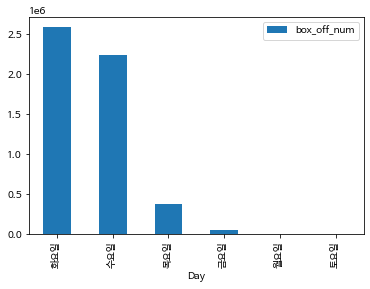

In [30]:
train[['Day','box_off_num']].groupby('Day').mean().sort_values('box_off_num', ascending=False).plot(kind='bar')

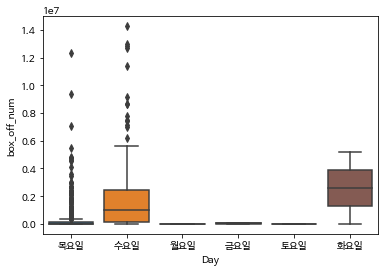

In [29]:
ax = plt.subplots()
ax = sns.boxplot(x='Day', y='box_off_num', data=train)

- barplot은 개봉 요일 별로 평균 관객 수가 많은 순서로 정렬되어 있다. boxplot을 통해 요일별 평균 관객 수를 보았을 때 화요일에 개봉한 영화의 평균 관객 수가 가장 많고, 토요일에 개봉한 영화의 평균 관객 수가 가장 적은 것을 알 수 있다. 데이터상에서 일요일은 집계되지 않았다.

### 5-3) 감독의 전 영화 개수와 현재 상영 영화 평균 관객 수의 관계

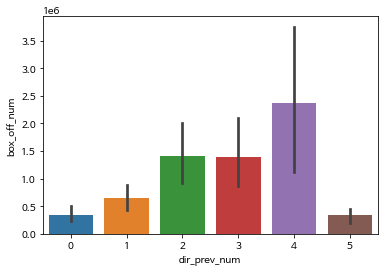

In [31]:
ax = plt.subplots()
ax = sns.barplot(x='dir_prev_num', y='box_off_num', data=train)

- 감독의 전 영화 개수가 가장 적을 때 평균 관객 수와 감독의 전 영화 개수가 가장 많을 때의 평균 관객 수가 비슷해보이므로 감독의 전 영화 개수와 현재 상영 영화의 평균 관객 수는 유의미한 관계가 없다.

### 5-4) 감독의 전 영화 평균 관객 수가 현재 상영 영화의 관객 수에 미치는 영향

<AxesSubplot:xlabel='dir_prev_bfnum', ylabel='box_off_num'>

<Figure size 1440x1080 with 0 Axes>

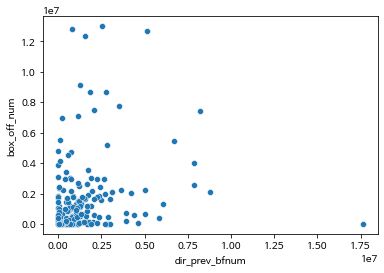

In [32]:
plt.figure(figsize=(20,15))
plt.subplots()
sns.scatterplot(x='dir_prev_bfnum', y='box_off_num', data=train)

- 감독의 전 영화의 평균 관객 수가 현재 상영 영화의 관객 수에 미치는 영향은 미미하다고 볼 수 있다.

### 5-5) 평균 관객 수 top 10 장르의 배급사

In [34]:
train_top5 = train[['distributor','box_off_num']].groupby('distributor').mean().sort_values('box_off_num', ascending=False).head(10)
train_top5

,box_off_num
distributor,
CJ E&M Pictures,4122337.0
(주)쇼박스,3386656.3
(주)아이필름코퍼레이션,3117859.0
쇼박스(주)미디어플렉스,2634823.0
영구아트무비,2541603.0
CJ E&M 영화부문,2505309.3
(주)NEW,2184404.8
CJ 엔터테인먼트,2162742.5
이십세기폭스코리아(주),1637046.0


<AxesSubplot:xlabel='distributor'>

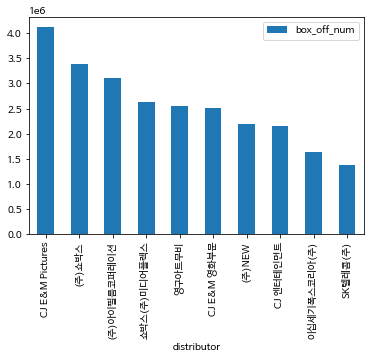

In [35]:
train_top5.plot(kind='bar')

- 평균 관객 수 기준 배급사 top 10은 CJ E&M Pictures를 선두로 (주)쇼박스, (주)아이필름코퍼레이션 등이다. CJ E&M Pictures를 > (주)쇼박스 > (주)아이필름코퍼레이션 > 쇼박스(주)미디어플렉스 > 영구아트무비 > CJ E&M 영화부문 > (주) NEW > CJ 엔터테인먼트 > 이십세기폭스코리아(주) > SK텔레콤(주) 순서로, 1위인 CJ E&M Pictures 는 8위인 CJ 엔터테인먼트보다 약 2배의 평균 관객 수를 보유하고 있다.

### 5-6) 영화 제목 길이와 관객 수의 상관관계

<AxesSubplot:xlabel='title_len'>

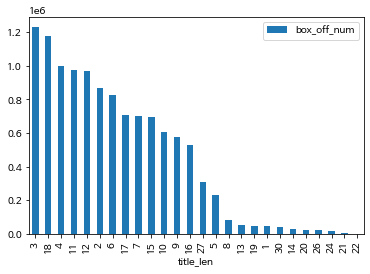

In [36]:
train['title_len'] = train['title'].str.len() # 제목 길이 변수

train[['title_len','box_off_num']].groupby('title_len').mean().sort_values('box_off_num', ascending=False).plot(kind='bar')

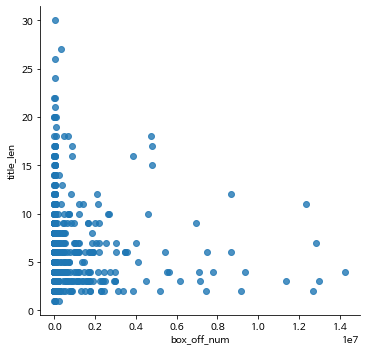

In [37]:
scatter = sns.lmplot(x='box_off_num', y='title_len', data=train, fit_reg = False) 

- 영화 제목의 길이와 평균 관객 수 간에는 큰 상관관계가 보이지 않지만 그래프를 보아 비교적 많은 평균 관객을 확보한 영화들은 세 글자인 경향이 높다고 할 수 있다.